# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

import os

## Generating Classification Data

In [2]:
data=make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
d = {'Exam 1': data[0][:,0], 'Exam 2': data[0][:,1], 'Admitted': data[1]}
data = pd.DataFrame(d)
data.head()

,Exam 1,Exam 2,Admitted
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1


## Plotting Data

Text(0,0.5,'Exam 2 Score')

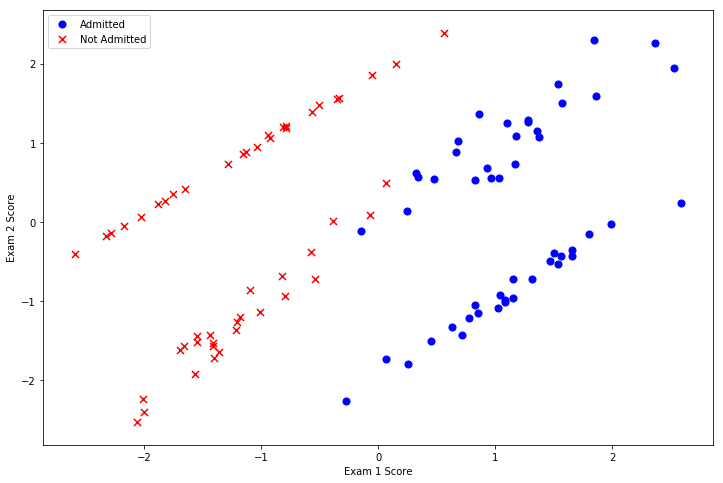

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## Reshaping Data

In [4]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

## Using Scikit-Learn

In [7]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X)

/Users/vrishank/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = %f' % (accuracy))

accuracy = 99.000000
